In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
df_flores = pd.read_csv('/content/drive/MyDrive/alkemy/GAUFlores_process.txt', sep='\t')
df_vmaria = pd.read_csv('/content/drive/MyDrive/alkemy/GAUNVillaMaria_process.txt', sep='\t')
df = pd.concat([df_flores, df_vmaria], ignore_index=True, axis=0)

## Inscriptos

In [68]:
#@title
print('Numero de inscriptos en la Universidad de Flores: ', df_flores.shape[0])
print('Numero de inscriptos en la Universidad Nacional de Villa Maria: ', df_vmaria.shape[0])

Numero de inscriptos en la Universidad de Flores:  1819
Numero de inscriptos en la Universidad Nacional de Villa Maria:  1837


# Edad

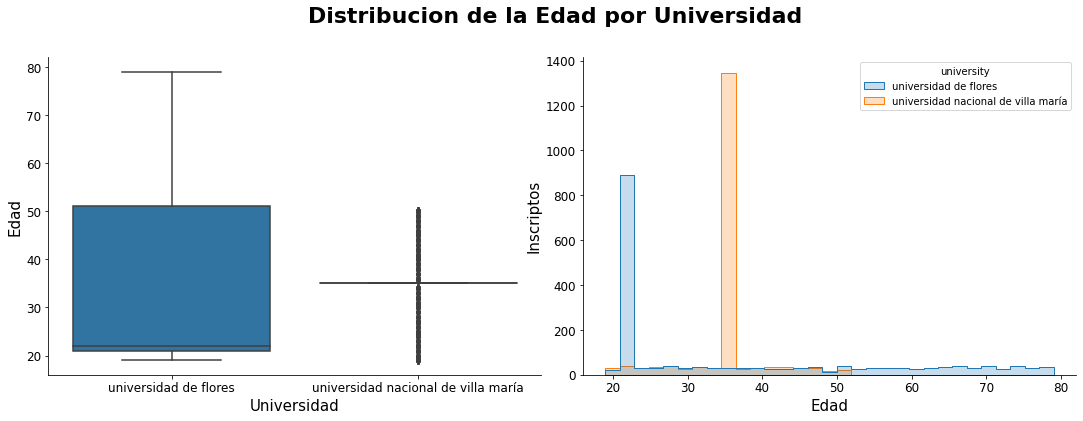

In [136]:
#@title
# Age
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5))
fig.tight_layout()

sns.boxplot(data=df, y='age', x='university', ax= ax0)
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.tick_params(axis='both', which='major', labelsize=12)
ax0.set_ylabel('Edad', fontsize=15)
ax0.set_xlabel('Universidad', fontsize=15)

# hacer histograma

df.sort_values('age', inplace=True)
sns.histplot(data=df, x='age', hue='university', element='step', ax=ax1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.set_ylabel('Inscriptos', fontsize=15)
ax1.set_xlabel('Edad', fontsize=15)

plt.suptitle('Distribucion de la Edad por Universidad', y=1.1, size=22, weight='bold')

plt.show()

In [87]:
pd.DataFrame(df_flores['age'].describe()).rename(columns={'age':'Estadisticos para la Edad Universidad de Flores'})

,Estadisticos para la Edad Universidad de Flores
count,1819.000000
mean,35.942276
std,19.157143
min,19.000000
25%,21.000000
50%,22.000000
75%,51.000000
max,79.000000


In [88]:
pd.DataFrame(df_vmaria['age'].describe()).rename(columns={'age':'Estadisticos para la Edad Universidad Nacional de Villa Maria'})

,Estadisticos para la Edad Universidad Nacional de Villa Maria
count,1837.000000
mean,34.873163
std,5.021492
min,19.000000
25%,35.000000
50%,35.000000
75%,35.000000
max,50.000000


# Genero

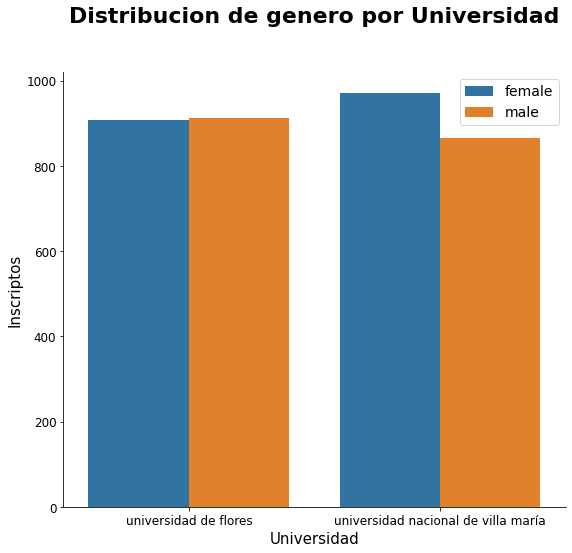

In [57]:
#@title
#gender
fig, ax = plt.subplots(figsize=(9,8))
df_gender = df.groupby(['university','gender']).agg(inscriptos=('last_name','count')).reset_index()
ax = sns.barplot(data=df_gender, x="university", y="inscriptos", hue="gender")
ax.set_title('Distribucion de genero por Universidad', fontweight='bold', fontsize=22, y=1.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc='upper right', prop={'size': 14})
ax.set_ylabel('Inscriptos', fontsize=15)
ax.set_xlabel('Universidad', fontsize=15)
plt.show()

In [80]:
#@title
df.groupby(['university', 'gender'])['last_name'].count().unstack('gender').transform(lambda x: round(x / sum(x) * 100, 2), axis=1)

gender,female,male
university,,
universidad de flores,49.86,50.14
universidad nacional de villa maría,52.91,47.09


# Carreras

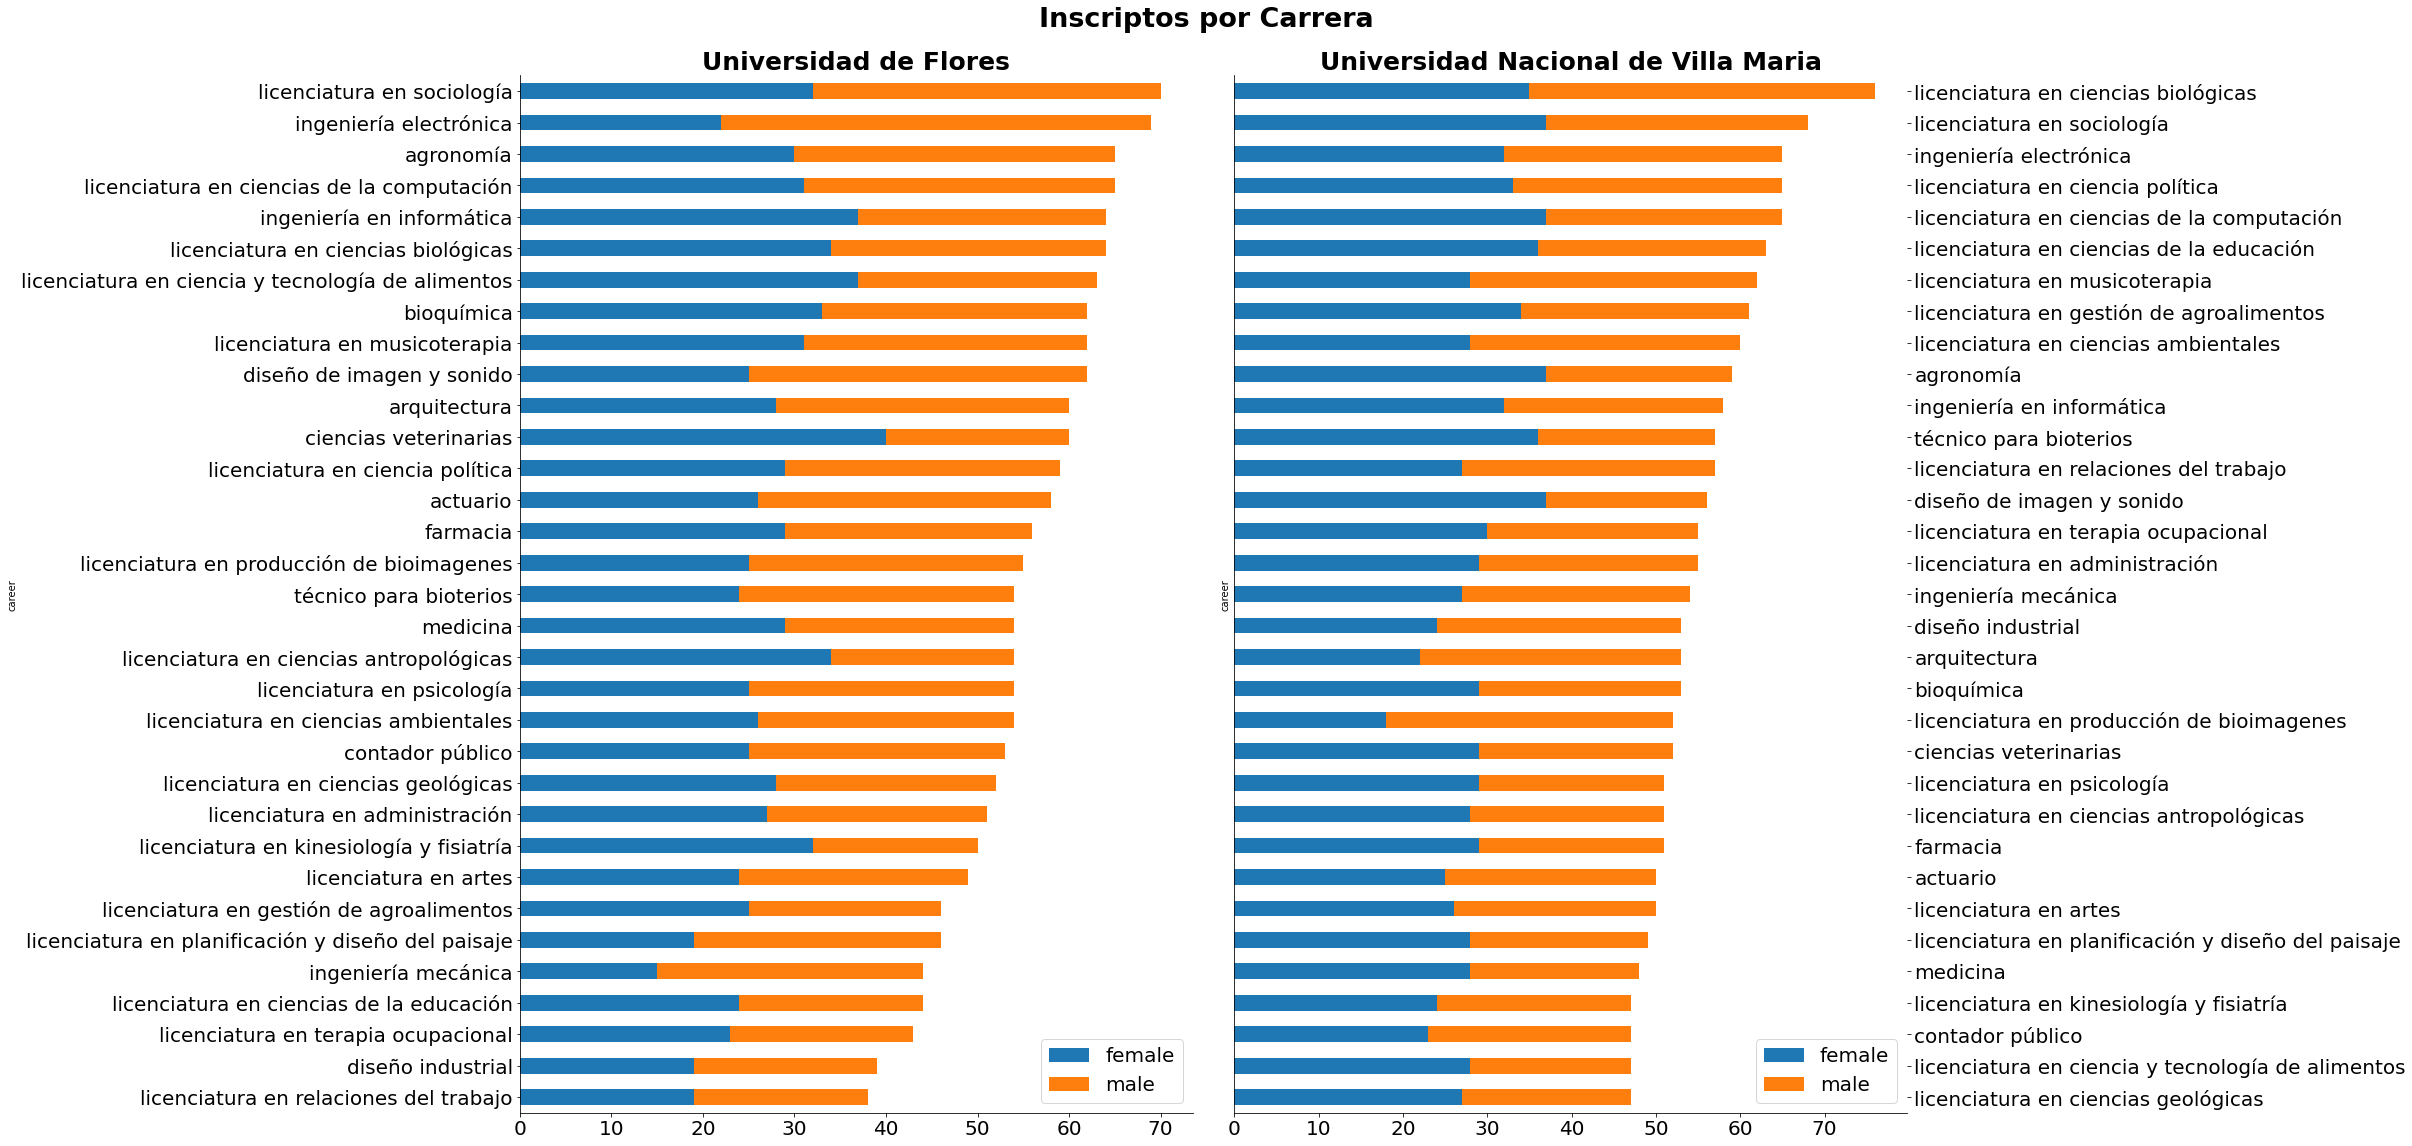

In [90]:
#@title
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,15))
fig.tight_layout()

df_career_gender_flores = df_flores.groupby(['gender','career']).agg(inscriptos=('last_name','count')).reset_index().pivot(columns='gender', index='career', values='inscriptos')
df_career_gender_flores['suma'] = df_career_gender_flores['female'] + df_career_gender_flores['male']
df_career_gender_flores = df_career_gender_flores.sort_values('suma', ascending=True)
df_career_gender_flores.drop(columns='suma', inplace=True)
df_career_gender_flores.plot(kind='barh', stacked=True, ax=ax0)

ax0.set_title('Universidad de Flores', fontweight='bold', fontsize=25, y=1.1)
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.tick_params(axis='both', which='major', labelsize=20)
ax0.legend(prop={'size': 20})


df_career_gender_vmaria = df_vmaria.groupby(['gender','career']).agg(inscriptos=('last_name','count')).reset_index().pivot(columns='gender', index='career', values='inscriptos')
df_career_gender_vmaria['suma'] = df_career_gender_vmaria['female'] + df_career_gender_vmaria['male']
df_career_gender_vmaria = df_career_gender_vmaria.sort_values('suma', ascending=True)
df_career_gender_vmaria.drop(columns='suma', inplace=True)
df_career_gender_vmaria.plot(kind='barh', stacked=True, ax=ax1)

ax1.set_title('Universidad Nacional de Villa Maria', fontweight='bold', fontsize=25, y=1.1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.tick_right()
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.legend(prop={'size': 20})

plt.suptitle('Inscriptos por Carrera', y=1.05, size=27, weight='bold')


plt.show()

In [134]:
#@title
carreras_flores_df = pd.pivot_table(df_flores,
               values= 'last_name',
               index=['career', 'gender'],
               aggfunc='count'
               ).unstack('gender').reset_index().droplevel('gender', axis=1)
               
carreras_flores_df.columns = ['career', 'female', 'male'] #.rename(columns={'last_name': 'female', 'last_name':' male'})


carreras_flores_df['Total'] = carreras_flores_df['female'] + carreras_flores_df['male']

carreras_flores_df.sort_values('Total', ascending=False)

,career,female,male,Total
29,licenciatura en sociología,32,38,70
9,ingeniería electrónica,22,47,69
1,agronomía,30,35,65
19,licenciatura en ciencias de la computación,31,34,65
18,licenciatura en ciencias biológicas,34,30,64
10,ingeniería en informática,37,27,64
15,licenciatura en ciencia y tecnología de alimentos,37,26,63
6,diseño de imagen y sonido,25,37,62
3,bioquímica,33,29,62
24,licenciatura en musicoterapia,31,31,62


In [135]:
#@title
carreras_vmaria_df = pd.pivot_table(df_vmaria,
               values= 'last_name',
               index=['career', 'gender'],
               aggfunc='count'
               ).unstack('gender').reset_index().droplevel('gender', axis=1)
               
carreras_vmaria_df.columns = ['career', 'female', 'male'] #.rename(columns={'last_name': 'female', 'last_name':' male'})


carreras_vmaria_df['Total'] = carreras_vmaria_df['female'] + carreras_vmaria_df['male']

carreras_vmaria_df.sort_values('Total', ascending=False)

,career,female,male,Total
18,licenciatura en ciencias biológicas,35,41,76
29,licenciatura en sociología,37,31,68
14,licenciatura en ciencia política,33,32,65
19,licenciatura en ciencias de la computación,37,28,65
9,ingeniería electrónica,32,33,65
20,licenciatura en ciencias de la educación,36,27,63
24,licenciatura en musicoterapia,28,34,62
22,licenciatura en gestión de agroalimentos,34,27,61
16,licenciatura en ciencias ambientales,28,32,60
1,agronomía,37,22,59


# Localidades

In [49]:
pd.DataFrame(df_vmaria['location'].value_counts().describe()).rename(columns={'location': 'Estadisticos Locacion Universidad de Villa Maria'})

,Estadisticos Locacion Universidad de Villa Maria
count,1048.000000
mean,1.752863
std,1.067445
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,12.000000


In [83]:
pd.DataFrame(df_flores['location'].value_counts().describe()).rename(columns={'location': 'Estadisticos Locacion Universidad de Fores'})

,Estadisticos Locacion Universidad de Fores
count,1033.000000
mean,1.760891
std,1.008654
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,10.000000


# Conclusion

A continuacion se presenta el analisis para las 2 universidades pertenecientes al  Grupo A, la Universidad de Flores y la Universidad Nacional de Villa Maria para los inscriptos entre 2020-09-01 y  2021-02-01.

El **numero de inscriptos** para dicho periodo para la Universidad de Flores fue de **1819** mientras que para Universidad Nacional de Villa Maria fue de **1837**

El analisis se centra sobre las dimensiones de **Edad**, **Genero**, **Carrera** y **Localidades** de lo inscriptos.


## Edad

Ambas Universidades tienen una distribucion sesgada, sesgo intruducido artificialmente durante la transformacion de los datos. Se fijo un criterio de filtrado entre 18 y 80 anos, pero como la mayoria de los registros caian fuera de ese rango, se dedicidio, en el caso de la Unv. de Flores, imputar ese valor con un valor de 22, mientras que para Unv de Villa Maria, se tomo la mediana de los valores que se encontraban en ese rango, quedando la edad fijada en 35 anos.

Por lo tanto no tiene sentido tomar en consideracion esta dimension par los analisis posteriores.

Podemos mencionar que las edades para la Unv de Flores se ecuentran mas dispersas, en un rango que va de  19 a 79, mientras que para la Unv de Villa Maria, los datos se encuentran mas comprimidos, comprendiendo un rango entre 19 y 50 anos.

## Genero

La distribucion de sexos para ambas universidades se encuentran equilibrados. La Unv de Flores tiene 49.86 % de mujeres y 50.14% de hombres. 
La Unv de Villa Maria presenta 52.91 % de mujeres y 47.09 % de hombres.

## Carreras

Como se puede apreciar en el grafico se detalla la  cantidad de inscriptos por carrera para cada universidad, y ademas se indica la porporcion de genero de los inscriptos.

Para la Universidad de Flores las carreras con mas inscriptos son lic. en Sociologia(70) e Ing. Electronica(69), en ambas con mayoria de hombres.

Las de menor inscriptos son disenio instrial (39, 19 mujeres, 20 hombres) y mas abajo relaciones del trabajo(38), con  misma proporcion de hombres y mujeres.

Para la Unv de Villa Maria las carreras con mas inscriptos son lic. en cs biologicas (76, 41 hombres , 35 mujeres),  y luego  lic. en Sociologia(68) con mayor proporcion de inscriptas mujeres.

Las de menor inscriptos, todas con 47 registros, son : contador publico, lic en cs geologicas, lic en cs y tecnologia de los alimentos y lic en kinesiologia y fisiatria.

# Localidad

Al igual que con la Edad esta una dimension que se no sirve para realizar ningun tipo de analisis.

Como muestran los estadisticos de esta dimenson hay gran cantidad de localidades(1033, 1048 para cada universidad respectivamente) desde  donde en el 50% de esas localidades proviene 1 solo inscripto  y en 75% de las localidades hasta 2 inscriptos. La cantidad maxima de incriptos provenientes de la misma localidad es 10 para la Unv de flores y 12 para Unv de Villa Maria.

Con estos numeros, muchas localidades con muy ocos inscriptos  es muy dificil encontrar algun patron o tendencia que pueda relacionarse con el resto de las dimensiones.


